  # ELECTRONIC BAND STRUCTURE Python Program

#### Import Libraries

In [1]:
###### This program will plot the electronic band structure of the data derived from DFT #####
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, FixedLocator

#### Import CSV File 

In [9]:
### To import the CSV file for bands
bands= pd.read_csv('bto_dft.csv') ## Name of the CSV File
#print(bands)

#### To Set Figure Dimetion

In [10]:
### To Set Image size
plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

#### To Setup Fonts

In [25]:
### Font for texts
LFont={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'}

#### To find Fermi Level

In [12]:
### To find Fermi Level
Ef=bands.Fermi[0]
#print(Ef,'eV')

#### To identify the Major ticks, Minor ticks and labels

In [13]:
### To find the last value in the Ticks Column
xmax=bands.Ticks.max()
#print(xmax)

### To find the index of the max value in the Ticks column
max_id=np.array(bands.Ticks).argmax()
#print("max",max_id)

### To load the Ticks and Tick Labels
ticks=bands.Ticks[:max_id]
label=bands.Label[:max_id]

### To find Minor Ticks 
##To find Minor ticks
mid = [ticks[i]+((ticks[i + 1] - ticks[i])/2) for i in range(len(ticks)-1)]
#print(mid)

#### To find Gamma POINT

In [14]:
##### To Find Gamma POINT by creating a dict like this {label:ticks}
# print(ticks)
# print(label)
T=[]
L=[]
for t in ticks:
    T.append(t)
for l in label:
    L.append(l)
# print(T)
# print(L)

HSP = {}
for key in L:
    for value in T:
        HSP[key] = value
        T.remove(value)
        break

### Gamma POINT
# print(HSP)
# print(HSP['Γ'])


#### To Plot the High Symmetry Point vs Energy data

Band Gap= 2.2488 eV


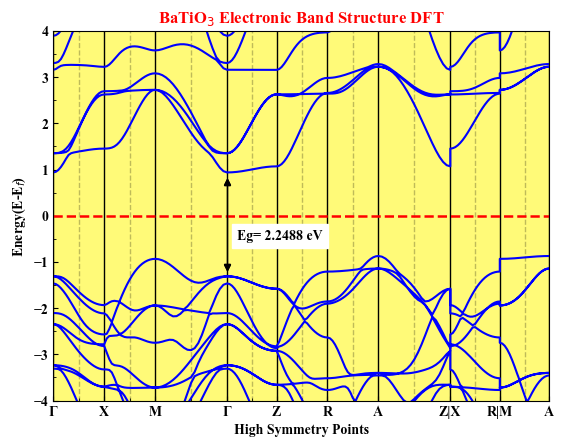

In [29]:
### Plot the HSP vs E-Ef band Stucture
fig, ax = plt.subplots()
plt.plot(bands.HSP,bands.Energy-Ef,color='b') #where energy subtracted from the fermi level


### To Set the axis Limits
plt.xlim(0,xmax)
plt.ylim(-4,4)


### To give Title
T1=bands.Title[0]
# print(T1)
T2=T1.split('-') #to remove character between strings
# print(T2)
Bands_Title=' '.join(T2) # to join the strings with space 
# print(Bands_Title)
plt.title(Bands_Title,fontdict={'fontname':'Times New Roman','fontsize':12,'fontweight':'bold','color':'r'})
# plt.title(bands.Title[0],fontdict={'fontname':'Times New Roman','fontsize':15,'fontweight':'bold'})



### print(ticks)
plt.xticks(ticks,label,fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})
plt.yticks(fontname = "Times New Roman",fontsize=10, fontweight='bold')


###  Grid on
#plt.grid(axis='x', linewidth=1, color='black')
ax.grid(which = "major", axis='x', linewidth=1, color='black') ## Major Grid on
ax.grid(which = "minor", alpha = 0.25, axis='x',linewidth=0.7, color='black',linestyle='--') ## Minor Grid On for x axis


### Major and Minor ticks on
ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.xaxis.set_minor_locator(FixedLocator(mid))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))



### To set the Ticks inward
ax.tick_params(axis='both',direction='in',which='both',grid_linewidth=1.0)

### Draw line at Fermi level
plt.axhline(0, color='r', linestyle='--',linewidth=1.8)


### To Set background color
ax.set_facecolor('#fffa78') # yellow color background


### Axis Labels
plt.xlabel('High Symmetry Points', fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})
plt.ylabel('Energy(E-E$_f$)',fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})


### To merge the bands coordinates as (x,y)
def merge(list1, list2): 
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list
 
BAND=merge(bands.HSP,bands.Energy-Ef) #(x,y)=(HSP,E)
#print(BAND)



### To find the BAND GAP
POS=[]
NEG=[]
for index, tup in enumerate(BAND):
#     print("x=",tup[0])
#     print("y=",tup[1])
    if tup[0]==HSP['Γ']:
        #print(tup[1])
        if tup[1]>0:
            POS.append(tup[1])
            y1=min(POS)
        if tup[1]<0:
            NEG.append(tup[1])
            y2=max(NEG)
Eg=y1-y2
x=HSP['Γ']
print("Band Gap=",  round(Eg,4), "eV")



### Arrow annotation inside the plot

plt.plot((x,x),(y1-0.2,y2+0.2), 'black',linewidth=1) # arrow line
plt.plot((x,x),(y1-0.2,y1-0.2), 'black', marker='^',markersize=5) # lower arrowhead
plt.plot((x,x),(y2+0.2,y2+0.2), 'black', marker='v',markersize=5) # upper arrowhead


### To show Band gap value in the plot
BandGap="Eg= "+str(round(Eg,4))+" eV"
plt.text(x+0.1,y2+0.8,BandGap,fontdict=LFont,backgroundcolor='#ffffff')


### Save PLot
plt.savefig(Bands_Title+'.png',dpi=1200)


### Show PLOT
plt.show()